In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Carregar arquivo para um DataFrame
df_exames = pd.read_csv('./datasets/exame_diabetes.csv')

In [19]:
# Visualizar estrutura
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   idade      100 non-null    int64
 1   peso       100 non-null    int64
 2   altura     100 non-null    int64
 3   resultado  100 non-null    int64
 4   genero_F   100 non-null    int64
 5   genero_M   100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


In [11]:
# Apresentar as 10 primeiras linhas
df_exames.head(10)

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100
5,M,64,93,190,117
6,F,21,70,182,90
7,F,60,101,179,84
8,F,63,83,189,92
9,F,65,78,175,121


In [8]:
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [16]:
# Remover coluna id_paciente
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [17]:
# Converter uma variável categórica (genero) em numérica, usando One-Hot-Enconding
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [18]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


<Axes: >

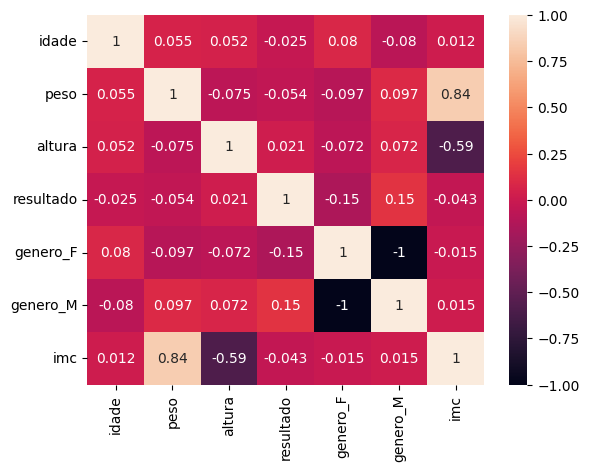

In [34]:
# Apresentar um mapa de calor com correlação entre variáveis
sns.heatmap(df_exames.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

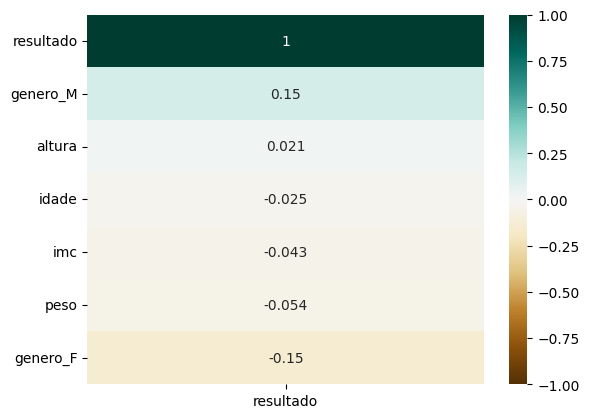

In [35]:
# Mapa de correlação só com a variável target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

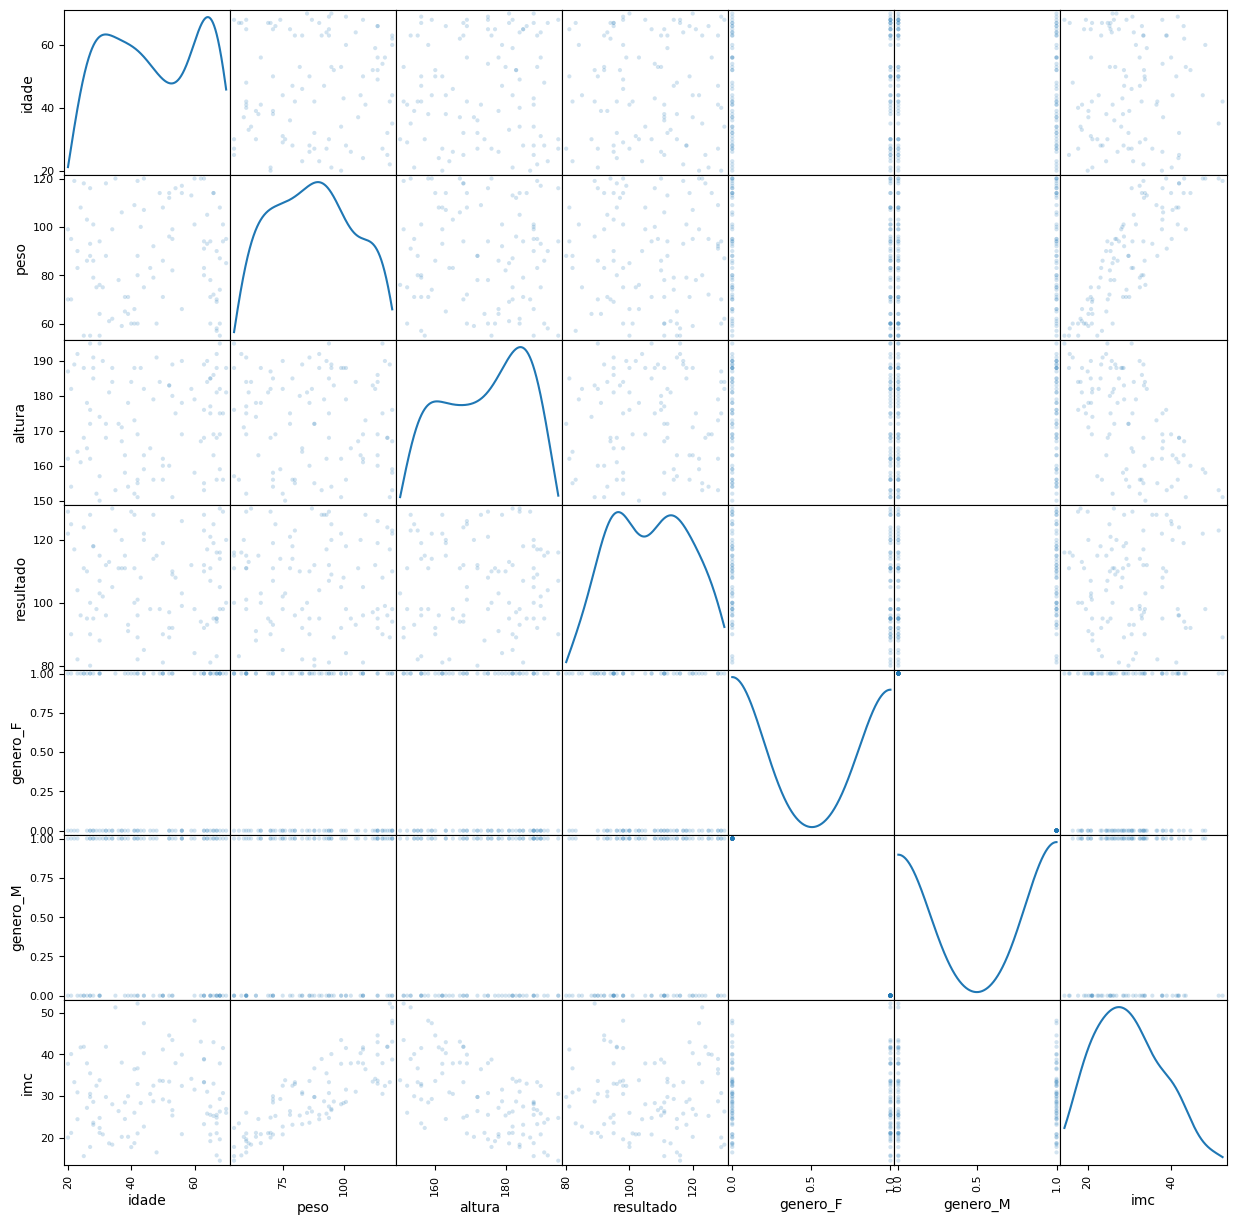

In [36]:
# Plot de Scatter (Dispersão) com distribuição
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(15,15), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

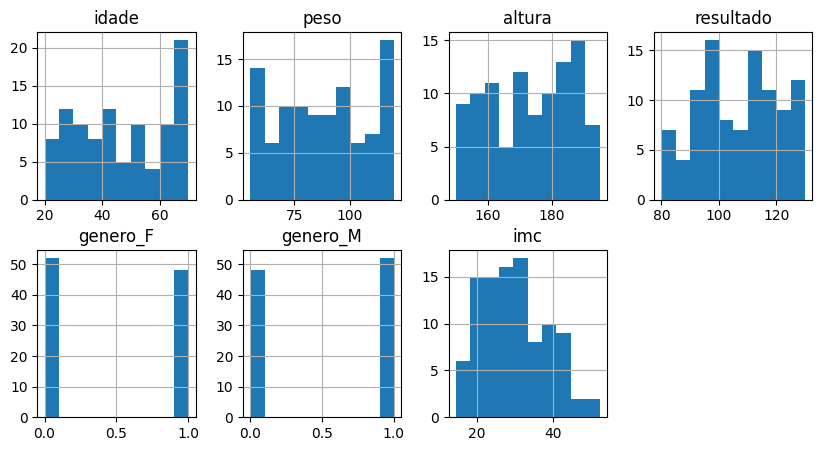

In [37]:
# Histograma de todas as variáveis
df_exames.hist(layout=(2,4), figsize=(10,5))

In [31]:
# Criar uma feature nova
# IMC (Indice de massa corporal)
# IMC = peso (kg) / altura (m) ^2
df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura']/100)**2))

In [32]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [33]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      100 non-null    int64  
 1   peso       100 non-null    int64  
 2   altura     100 non-null    int64  
 3   resultado  100 non-null    int64  
 4   genero_F   100 non-null    int64  
 5   genero_M   100 non-null    int64  
 6   imc        100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


In [38]:
dict_regressao = {'tempo_casa': [1, 3, 6, 9, 10, 14, 18], 'salario': [1500, 3000, 4500, 6000, 7000, 8500, 10000]}

In [39]:
df_regressao_simples = pd.DataFrame.from_dict(dict_regressao)

<Axes: xlabel='tempo_casa', ylabel='salario'>

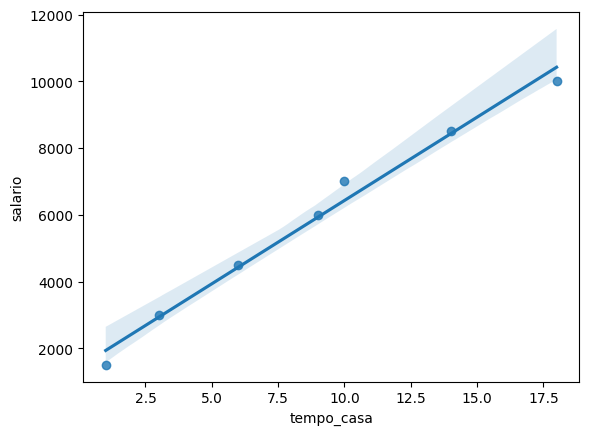

In [40]:
sns.regplot(data=df_regressao_simples, x='tempo_casa', y='salario')

In [41]:
# Importar bibliotecas do sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [42]:
# Modelo 1 - Sem IMC
X = df_exames.drop(columns=['imc', 'resultado'])
y  = df_exames['resultado']

In [45]:
# Dividir conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [53]:
y_test

71     92
43    103
11    115
83    112
78    126
19    116
80     81
4     100
79    120
75    110
72    100
44    130
46    102
90     97
56    123
2      93
47    123
51    116
0      98
97    125
65     93
12    111
32    107
82    128
66     96
14     80
81    119
91    113
15     91
74    128
Name: resultado, dtype: int64